# Machine Learning for Post-Processing NWM Data 
**Authors: Savalan Naser Neisary (PhD Student, CIROH & The University of Alabama)**




### 1. Introduction 
#### 1.1. Overview of the Workshop’s Goals and Structure.

This is going to be 90 minutes workshop in which we will:
- Introduce post-processing and its application in hydrology.
- Learn how to develop different types of decision tree models including Random Forest (RF) and Extreme Gradient Boosting (XGBoost). 
- Learn how to tune model hyperparameters. 
- Learn how to do the feature selection using decision-tree based algorithms. 
- Learn how to use Git and Amazon S3 buckets in our model development process. 

We will first go over the theoretical background behind the decision-trees and the pros and cons of the most powerful decision-tree algorithms. Then, we will start the hands-on part of the workshop and how we should set up our environments and how to get codes and data from GitHub repositories and Amazon S3 buckets. Next, we plan to get the data preprocess them, and start model development using different decision-tree algorithms. After that, we will talk about the feature selection and hyperparameter tuning (i.e., manually and automatically). Finally, we will evaluate the tree models and see compare them from different perspective in a real hydrology application. 
#### 1.2. Post-processing Hydrological Predictions

Effective and sustainable management of water resources is crucial to provide adequate water supply for human societies, regardless of their geographical location. Having an accurate and precise prediction of future hydrological variables, including streamflow is a critical component for an effective water systems management, and various studies presented different methods, such as post-processing to increase the accuracy of the hydrological predictions. Post-processing methods seek to quantify the uncertainties of hydrological model outcomes and correct their biases by using a statistical model to transform model outputs based the relationship(s) between observations and model. According to the literature Machine Learning (ML) models proved to be useful in post-processing the results of other ML or physical-based hydrological models. Therefore, in this workshop we will use decision-tree algorithms, an ensemble  subgroup of ML models, to post-process streamflow outputs of a physical-baed model. 
#### 1.3. Post-processing Retrospective National Water Model (NWM) Streamflow Data

NOAA introduced the NWM to address the need for an operational large-scale hydrological forecasting model to provide streamflow predictions in CONUS. While it has the capability of predicting streamflow in 2.7 billion water reaches, according to the literature, NWM has a low accuracy in regions west of the 95th meridian with drought and low-flow problem and in controlled basins with extensive water infrastructure. This low performance in western US watersheds is due to the lack of water operation consideration and a comprehensive groundwater and snow model beside calibrating NWM mostly with watersheds in eastern US. To compensate for NWM shortcomings in this workshop we will demonstrate how we can use decision-trees to increase its accuracy by post-processing the NWM outputs and adding the human activity impact to it.   

###### Recommended Resources:
- Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow.
- C4.5: Programs for Machine Learning.
- A Holistic Comparative Application of Artificial Intelligence Methods in Reservoir Inflow Forecast. 






### 2. Theoretical Background 

#### 2.1. Decision-Trees Algorithm

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.Decision trees are recursively constructed multidimensional histograms. Decision tree learning employs a divide and conquer strategy by conducting a greedy search to identify the optimal split points within a tree. This process of splitting is then repeated in a top-down, recursive manner until all, or the majority of records have been classified under specific class labels. Hunt’s algorithm, which was developed in the 1960s to model human learning in Psychology, forms the foundation of many popular decision tree algorithms, such as ID3, C4.5, and CART. 

PIC


Advantages

- Easy to interpret: The Boolean logic and visual representations of decision trees make them easier to understand and consume. The hierarchical nature of a decision tree also makes it easy to see which attributes are most important, which isn’t always clear with other algorithms, like neural networks.
- Little to no data preparation required: Decision trees have a number of characteristics, which make it more flexible than other classifiers. It can handle various data types—i.e. discrete or continuous values, and continuous values can be converted into categorical values through the use of thresholds. Additionally, it can also handle values with missing values, which can be problematic for other classifiers, like Naïve Bayes.  
- More flexible: Decision trees can be leveraged for both classification and regression tasks, making it more flexible than some other algorithms. It’s also insensitive to underlying relationships between attributes; this means that if two variables are highly correlated, the algorithm will only choose one of the features to split on. 

Disadvantages

- Prone to overfitting: Complex decision trees tend to overfit and do not generalize well to new data. This scenario can be avoided through the processes of pre-pruning or post-pruning. Pre-pruning halts tree growth when there is insufficient data while post-pruning removes subtrees with inadequate data after tree construction. 
- High variance estimators: Small variations within data can produce a very different decision tree. Bagging, or the averaging of estimates, can be a method of reducing variance of decision trees. However, this approach is limited as it can lead to highly correlated predictors.  
- More costly: Given that decision trees take a greedy search approach during construction, they can be more expensive to train compared to other algorithms. 

#### 2.2. Random Forest (RF) Algorithm

RF is a widely used machine learning algorithm developed by Leo Breiman and Adele Cutler. RF is based on decision-trees, but it is based on the *Wisdom of the Crowd*, which means it aggregate the results of a group of DTs. Using the results of more than one models is called *ensemble*, so we can say that RF is an ensemble algorithm since it aggregates the results of several number of DTs. Using an ensemble of decision trees can largely reduce the overfitting and prediction variance, providing more accurate results. RF is an extension of the bagging approach, which generates a random subset of both samples and features for each model training. While a DT is based on all features to make decisions, the RF algorithm only uses a subset of features, which can reduce the influence of highly correlated features in model prediction.

Advantages

- Reduced risk of overfitting: Decision trees run the risk of overfitting as they tend to tightly fit all the samples within training data. However, when there’s a robust number of decision trees in a random forest, the classifier won’t overfit the model since the averaging of uncorrelated trees lowers the overall variance and prediction error.
- Provides flexibility: Since random forest can handle both regression and classification tasks with a high degree of accuracy, it is a popular method among data scientists. Feature bagging also makes the random forest classifier an effective tool for estimating missing values as it maintains accuracy when a portion of the data is missing.
- Easy to determine feature importance: Random forest makes it easy to evaluate variable importance, or contribution, to the model. There are a few ways to evaluate feature importance. Gini importance and mean decrease in impurity (MDI) are usually used to measure how much the model’s accuracy decreases when a given variable is excluded. However, permutation importance, also known as mean decrease accuracy (MDA), is another importance measure. MDA identifies the average decrease in accuracy by randomly permutating the feature values in oob samples.

Disadvantages

- Time-consuming process: Since random forest algorithms can handle large data sets, they can provide more accurate predictions, but can be slow to process data as they are computing data for each individual decision tree.
- Requires more resources: Since random forests process larger data sets, they’ll require more resources to store that data.
- More complex: The prediction of a single decision tree is easier to interpret when compared to a forest of them.

#### 2.3. Extreme Gradient Boosting (XGBoost) Algorithm
XGBoost is one of the algorithms based on Boosting ensemble method, and the idea behind it is to train the predictors sequentially, each trying to correct its predecessor. XGBoost method tries to fit the new predictor to the residual errors made by the previous predictor. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models. XGBoost gained significant favor in the last few years as a result of helping individuals and teams win virtually every Kaggle structured data competition. 

Advantages

- Gradient Boosting comes with an easy to read and interpret algorithm, making most of its predictions easy to handle.
- Boosting is a resilient and robust method that prevents and cubs over-fitting quite easily
- XGBoost performs very well on medium, small, data with subgroups and structured datasets with not too many features. 
- It is a great approach to go for because the large majority of real-world problems involve classification and regression, two tasks where XGBoost is the reigning king. 

Disadvantages 

- XGBoost does not perform so well on sparse and unstructured data.
- A common thing often forgotten is that Gradient Boosting is very sensitive to outliers since every classifier is forced to fix the errors in the predecessor learners. 
- The overall method is hardly scalable. This is because the estimators base their correctness on previous predictors, hence the procedure involves a lot of struggle to streamline. 


## 3. Setting Up the Codes and Notebook

#### 3.1. Access the GitHub Codes
First we download the code files from the GitHub. In the terminal you should use the following command:

#### 3.2. Import the Python Libraries
Nest we will import the libraries that we need. 

In [2]:
# system packages
from datetime import datetime, date, timedelta
import pickle
import warnings
warnings.filterwarnings("ignore")
import platform
import time
from tqdm import tqdm
import os
import boto3
from botocore.client import Config
from botocore import UNSIGNED

# basic packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Patch
import math
from evaluation_table import EvalTable

# model packages
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import MinMaxScaler
import joblib
from shapely.geometry import Point
import geopandas as gpd
import pyproj
from pyproj import datadir
pyproj.datadir.get_data_dir()
datadir.set_data_dir('/home/jovyan/envs/devcon_xgboost/share/proj')  # replace with the actual path to the PROJ data

# Identify the path
home = os.getcwd()
parent_path = os.path.dirname(home)
input_path = f'{parent_path}/02.input/'
output_path = f'{parent_path}/03.output/'
main_path = home

#### 3.3. Access the Data on Amazon S3 Bucket
To get the data from S3 buckets you will use the *boto3* package that we downloaded. To use this package we do not need the terminal anymore, so now we will open the *01.tutorial_post_processing.ipynb* from the left hand side and click on the *3.3. Access the Data on Amazon S3 Bucket* in the table of contents to come to this line. For the rest of the tutorial we will use this notebook. 

In [3]:
#load access key
keypath = "aws_key.csv"
access = pd.read_csv(f"{input_path}{keypath}")

#start session
session = boto3.Session(
    aws_access_key_id=access['Access key ID'][0],
    aws_secret_access_key=access['Secret access key'][0])
bucket_name = 'streamflow-app-data'
s3 = boto3.resource('s3', config=Config(signature_version=UNSIGNED))
bucket = s3.Bucket(bucket_name)


## 4. Data Preprocessing
#### 4.1. Overview of the USGS Stream Station
- The dataset that we will use provides the data for seven GSL watershed stations. 
- The dataset contains climate variables, such as precipitation and temperature, water infrastructure, storage percentage, and watershed characteristics, such as average area and elevation. 
You can see the location of the station and its watershed in the Figure below. 

#### 4.2. Load Dataset
- Using the boto3 libarary we get the input dataset from the CIROH S3 bucket.

In [4]:
# List of station IDs that are of interest.
stations = ['10126000', '10130500', '10134500', '10136500', '10137500', '10141000', '10155000', '10164500', '10171000']

# Read a CSV file into a DataFrame and set the first column as the index.
df = df = pd.read_parquet(f'{input_path}final_input.parquet')

# Convert the station_id column to string data type.
df.station_id = df.station_id.astype(str)

# Convert the 'datetime' column to datetime objects.
df.datetime = pd.to_datetime(df.datetime)

# Filter the DataFrame to include only the rows where 'station_id' is in the 'stations' list.
df_modified = df[df['station_id'].isin(stations)]

# Select specific columns to create a new DataFrame.
dataset = df_modified[['station_id', 'datetime', 'Lat', 'Long', 'Drainage_area_mi2', 'Mean_Basin_Elev_ft',
       'Perc_Forest', 'Perc_Develop', 'Perc_Imperv', 'Perc_Herbace',
       'Perc_Slop_30', 'Mean_Ann_Precip_in', 's1',
       's2', 'storage', 'swe', 'NWM_flow', 'DOY','tempe(F)', 'precip(mm)', 'flow_cfs']]

# Extract a list of unique station IDs from the modified dataset.
station_list = dataset.station_id.unique()


#### 4.3. Visualizing the Data
- The takeaway from data visualization is to gather information about data distribution, outliers, missing values, correlation between different variables, and time dependencies between variables.
- Here, we will use boxplots, histograms, and combo bar and line plots to show outliers, distribution, and time dependencies in streamflow, precipitation, temperature, and SWE.

First, we will plot the time dependencies using bar and line plots for streamflow vs precipitation and SWE. 

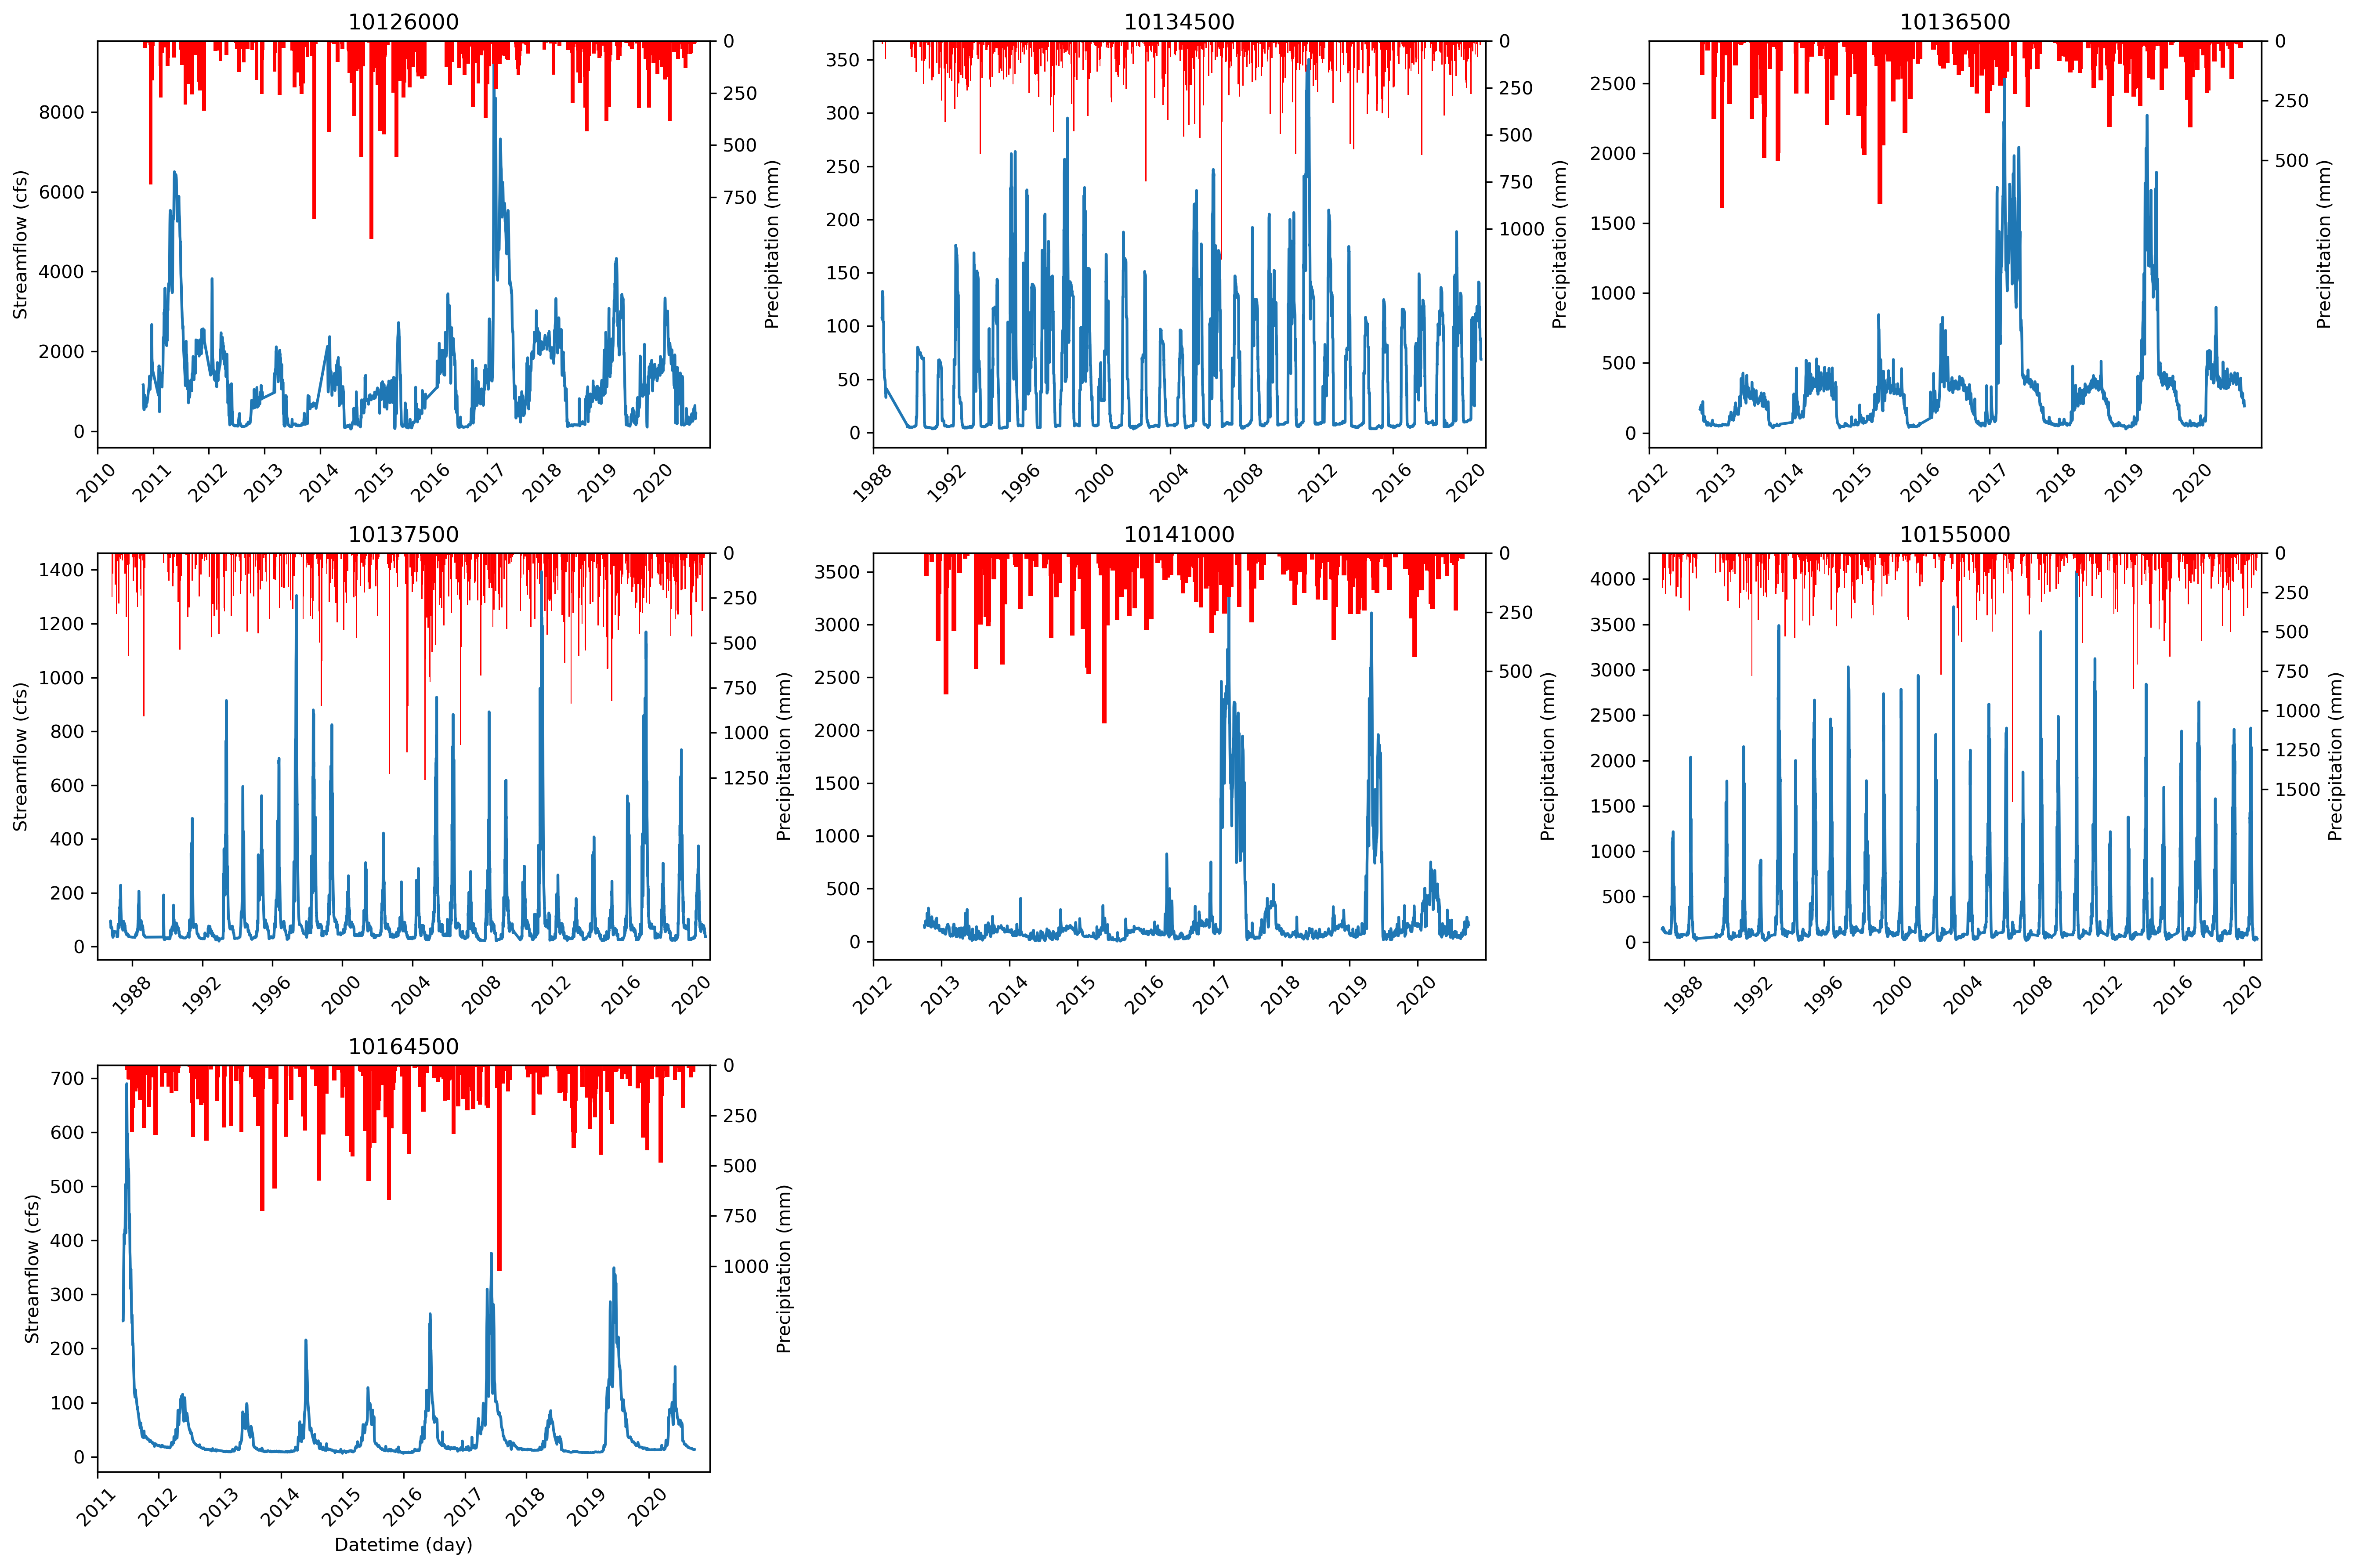

CPU times: user 43.7 s, sys: 642 ms, total: 44.3 s
Wall time: 44.3 s


In [5]:
%%time
# Calculate the number of subplots needed based on the number of unique stations.
n_subplots = len(station_list)
# Determine the number of columns in the subplot grid by taking the ceiling of the square root of 'n_subplots'.
n_cols = int(math.ceil(math.sqrt(n_subplots)))
# Determine the number of rows in the subplot grid by dividing 'n_subplots' by 'n_cols' and taking the ceiling of that.
n_rows = int(math.ceil(n_subplots / n_cols))
# Set the figure size for the subplots.
figsize = (18, 12)
# Create a grid of subplots with specified number of rows and columns and figure size.
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, dpi=300)
# Flatten the axes array for easier iteration.
axes = axes.flatten()

# Iterate over the axes to plot the data for each station.
for i, ax in enumerate(axes):
    if i < n_subplots:
        # Extract the data for the current station from the dataset.
        temp_df_1 = dataset[dataset.station_id == station_list[i]]
        # Set 'datetime' as the index for plotting.
        temp_df_2 = temp_df_1.set_index('datetime')
        # Plot the 'flow_cfs' data on the primary y-axis.
        ax.plot(temp_df_2.index, temp_df_2['flow_cfs'])
        # Set the x-axis limits from the first to the last year of data.
        start_year = pd.to_datetime(f'{temp_df_1.datetime.dt.year.min()}-01-01')
        end_year = pd.to_datetime(f'{temp_df_1.datetime.dt.year.max()}-12-31')
        ax.set_xlim(start_year, end_year)
        # Rotate x-axis labels for better readability.
        labels = ax.get_xticklabels()
        ax.set_xticklabels(labels, rotation=45)

        # Create a second y-axis for the precipitation data.
        ax2 = ax.twinx()
        # Plot the 'precip(mm)' data as a bar graph on the secondary y-axis.
        ax2.bar(temp_df_2.index, temp_df_2['precip(mm)'], label='Inverted', color='red', width=25)
        # Set the y-axis limits for precipitation, flipping the axis to make bars grow downward.
        ax2.set_ylim(max(temp_df_2['precip(mm)']) + 1000, 0)
        # Set the label for the secondary y-axis.
        ax2.set_ylabel('Precipitation (mm)')
        # Define custom ticks for the secondary y-axis.
        ax2.set_yticks(np.arange(0, max(temp_df_2['precip(mm)']), 250))

        # Set the title of the subplot to the station ID.
        ax.set_title(f'{station_list[i]}')
        # Set the x-axis label for subplots in the last row.
        if i // n_cols == n_rows - 1:
            ax.set_xlabel('Datetime (day)')

        # Set the y-axis label for subplots in the first column.
        if i % n_cols == 0:
            ax.set_ylabel('Streamflow (cfs)')
    else:
        # Hide any unused axes.
        ax.axis('off')

# Adjust layout to prevent overlapping elements.
plt.tight_layout()
# Uncomment the line below to save the figure to a file.
# plt.savefig(f'{save_path}scatter_annual_drought_number.png')
# Display the plot.
plt.show()


The next plot shows SWE vs streamflow. 

In [5]:
%%time
# Initialize variables for the number of plots, columns, and rows based on the number of unique stations.
n_subplots = len(station_list)
n_cols = int(math.ceil(math.sqrt(n_subplots)))  # Calculate columns as the ceiling of the square root of number of subplots.
n_rows = int(math.ceil(n_subplots / n_cols))  # Calculate rows as the ceiling of the ratio of subplots to columns.
figsize = (18, 12)  # Set the figure size for the plot.
# Create a figure and a grid of subplots with the specified number of rows and columns.
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, dpi=300)
axes = axes.flatten()  # Flatten the axes array for easier iteration.

# Iterate over each axis to plot data for each station.
for i, ax in enumerate(axes):
    if i < n_subplots:  # Check if the current index is less than the number of subplots to populate.
        # Extract data for the current station.
        temp_df_1 = dataset[dataset.station_id == station_list[i]]
        # Set 'datetime' as the index for the DataFrame for plotting.
        temp_df_2 = temp_df_1.set_index('datetime')
        # Plot 'flow_cfs' on the primary y-axis.
        ax.plot(temp_df_2.index, temp_df_2['flow_cfs'])
        # Set x-axis limits from the minimum to maximum year of data.
        start_year = pd.to_datetime(f'{temp_df_1.datetime.dt.year.min()}-01-01')
        end_year = pd.to_datetime(f'{temp_df_1.datetime.dt.year.max()}-12-31')
        ax.set_xlim(start_year, end_year)
        # Get current x-tick labels and set their rotation for better visibility.
        labels = ax.get_xticklabels()
        ax.set_xticklabels(labels, rotation=45)

        # Create a secondary y-axis for Snow Water Equivalent (SWE).
        ax2 = ax.twinx()
        # Plot SWE as a bar graph on the secondary y-axis.
        ax2.bar(temp_df_2.index, temp_df_2['swe'], label='Inverted', color='red')
        # Set the y-axis limits for SWE, flipping the axis to make bars grow downward.
        ax2.set_ylim(max(temp_df_2['swe']) + 40, 0)
        # Set label for the secondary y-axis.
        ax2.set_ylabel('SWE')
        # Define custom ticks for the secondary y-axis.
        ax2.set_yticks(np.arange(0, max(temp_df_2['swe']), 5))

        # Set the title of the subplot to the station ID.
        ax.set_title(f'{station_list[i]}')
        # Set the x-axis label for subplots in the last row.
        if i // n_cols == n_rows - 1:
            ax.set_xlabel('Datetime (day)')

        # Set the y-axis label for subplots in the first column.
        if i % n_cols == 0:
            ax.set_ylabel('Streamflow (cfs)')
    else:
        # Hide any unused axes.
        ax.axis('off')

# Adjust the layout to prevent overlapping elements.
plt.tight_layout()
# Uncomment the line below to save the figure to a file.
# plt.savefig(f'{save_path}scatter_annual_drought_number.png')
# Display the plot.
plt.show()


CPU times: user 45.3 s, sys: 338 ms, total: 45.6 s
Wall time: 45.7 s


Next, we will use histograms for streamflow to see its skewness and distribution. 

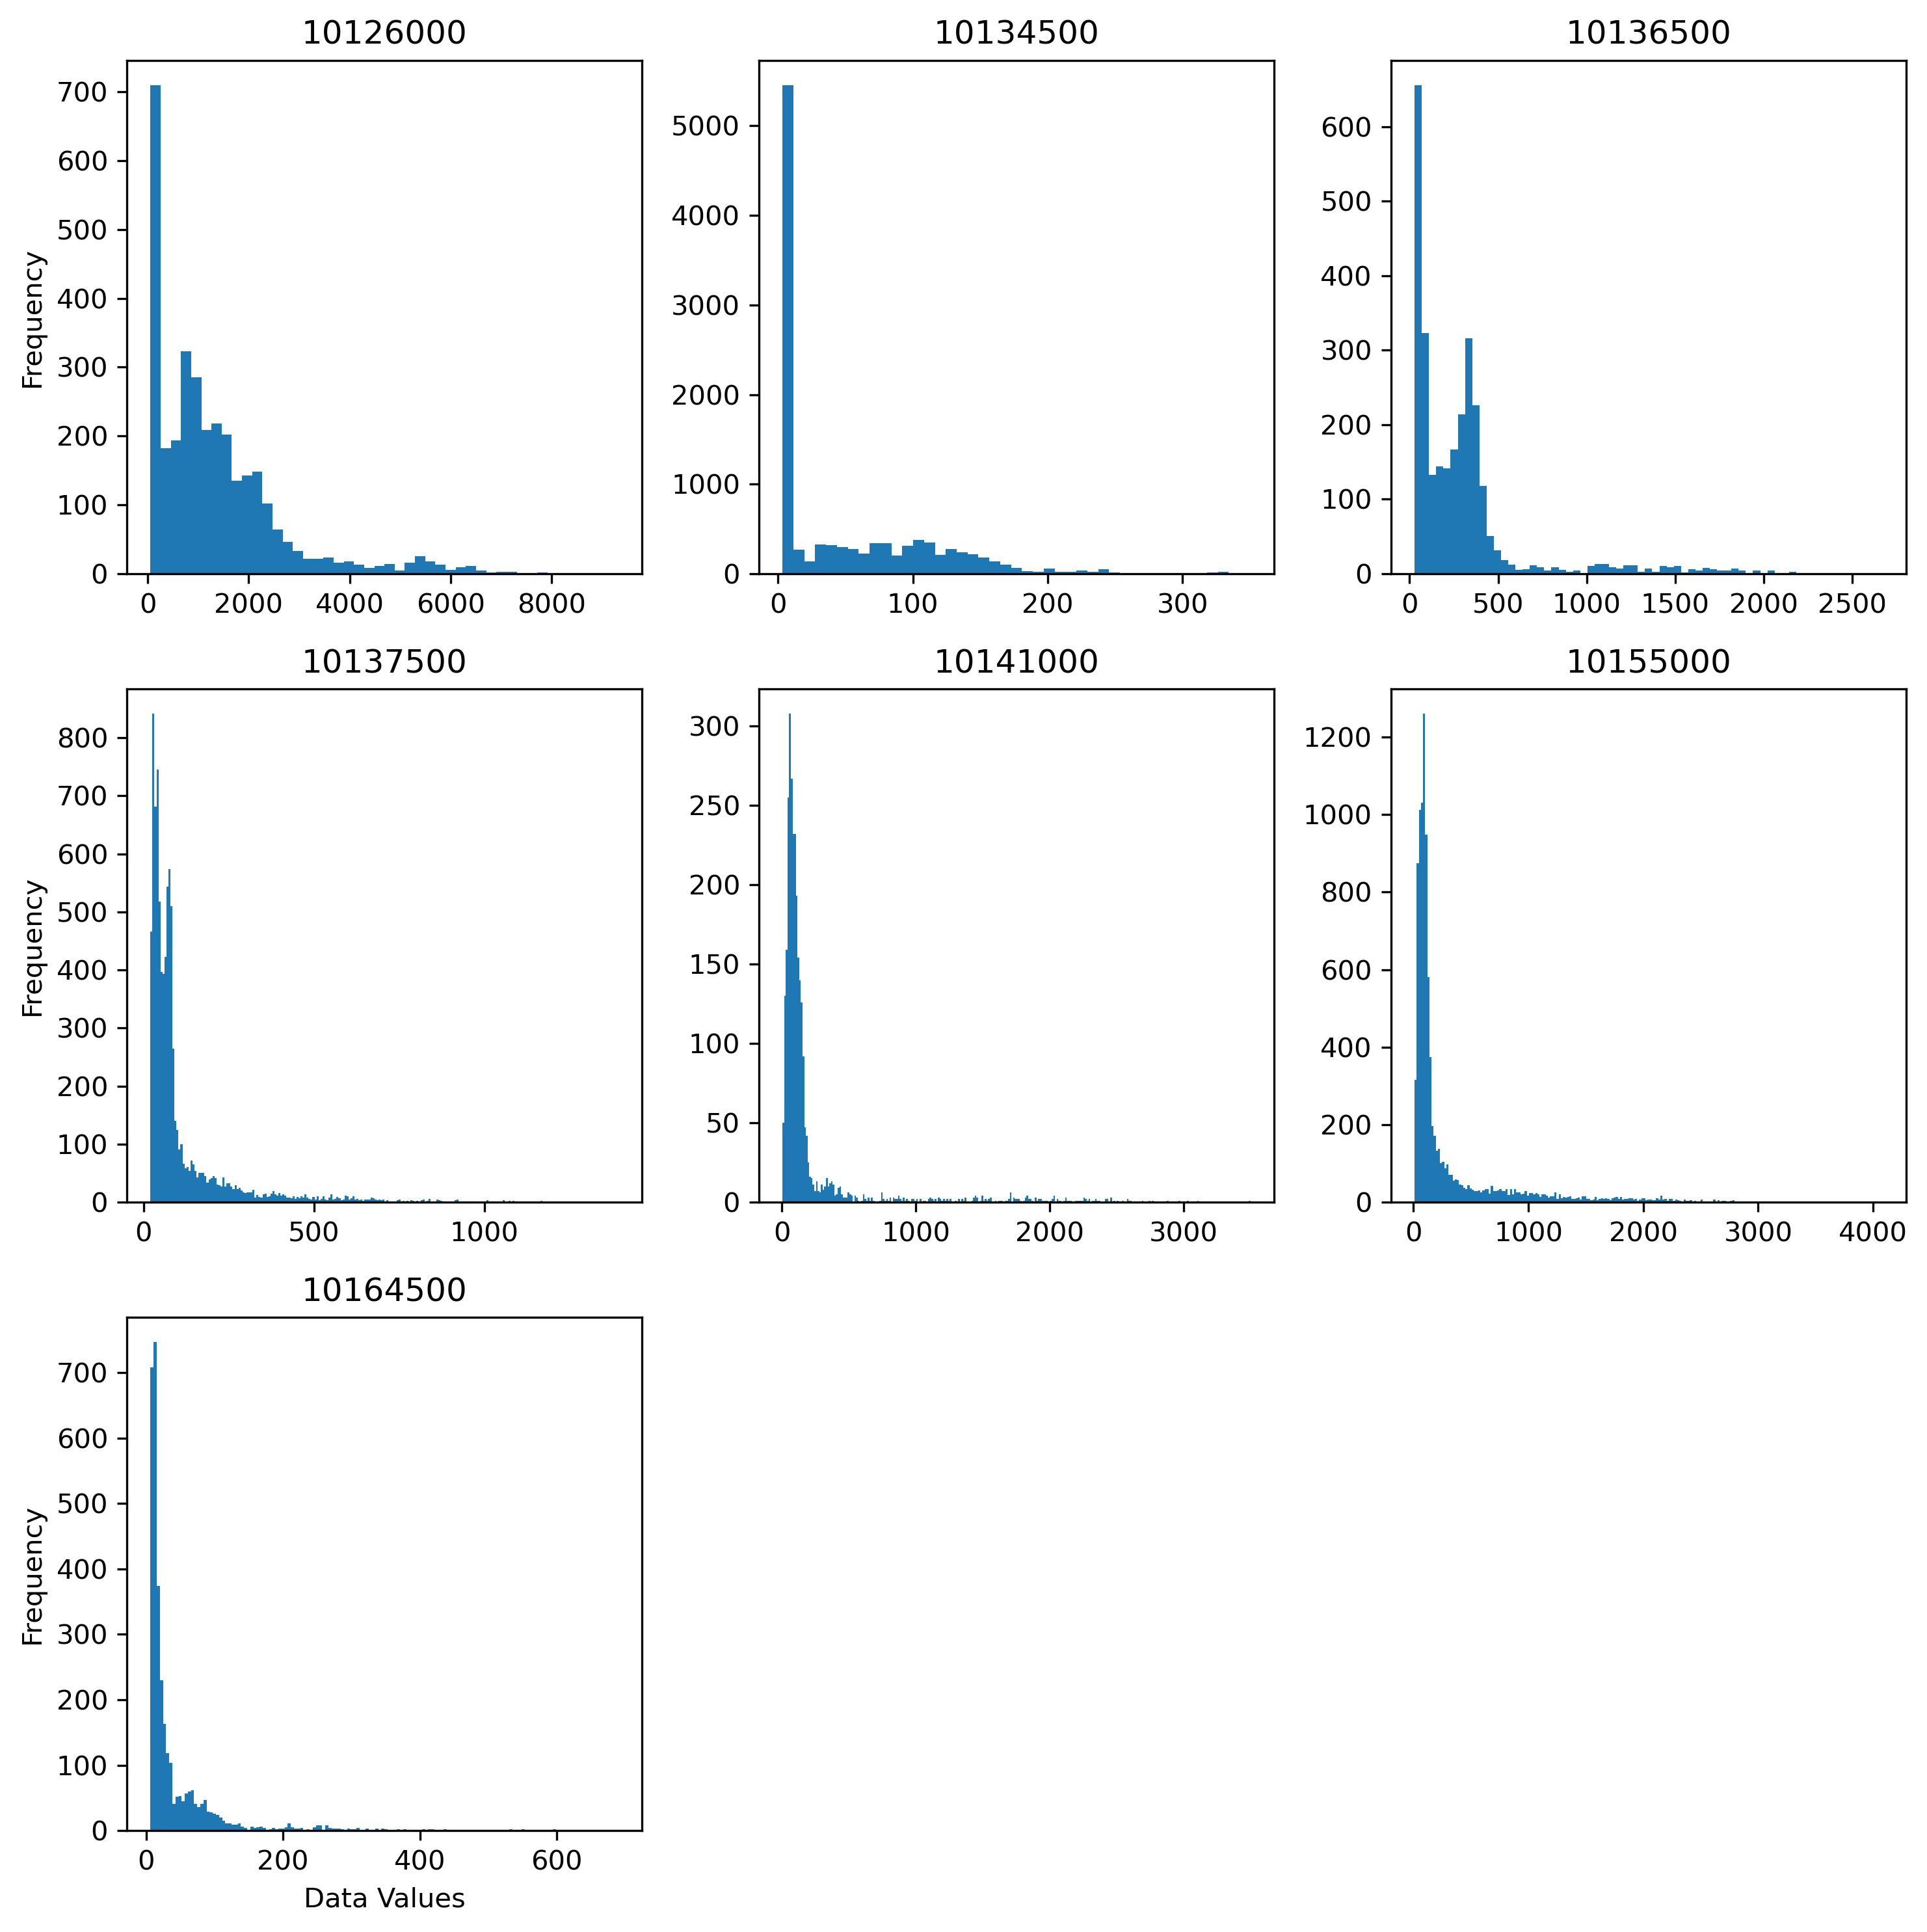

CPU times: user 2.23 s, sys: 55 ms, total: 2.29 s
Wall time: 2.29 s


In [6]:
%%time
# Determine the number of subplots based on the number of unique stations.
n_subplots = len(station_list)
# Calculate the number of columns for subplots based on the square root of the number of subplots.
n_cols = int(math.ceil(math.sqrt(n_subplots)))
# Calculate the number of rows for subplots based on the total subplots and columns.
n_rows = int(math.ceil(n_subplots / n_cols))
# Set the size of the figure for subplots.
figsize = (10, 10)
# Create a figure and a grid of subplots with the specified rows and columns, and figure size.
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, dpi=300)
axes = axes.flatten()  # Flatten the axes array for easier access in looping.

# Loop through each axis to plot histogram for each station.
for i, ax in enumerate(axes):
    if i < n_subplots:
        # Extract the data for the current station.
        temp_df_1 = dataset[dataset.station_id == station_list[i]]

        # Calculate the Interquartile Range (IQR) for the 'flow_cfs' data.
        IQR = np.percentile(temp_df_1['flow_cfs'], 75) - np.percentile(temp_df_1['flow_cfs'], 25)
        # Calculate the bin width using Freedman-Diaconis rule which is optimal for histogram.
        bin_width = 2 * IQR * (len(temp_df_1['flow_cfs']) ** (-1/3))
        # Calculate the number of bins for the histogram using the calculated bin width.
        bins_fd = int((max(temp_df_1['flow_cfs']) - min(temp_df_1['flow_cfs'])) / bin_width)

        # Plot a histogram of 'flow_cfs' for the station with calculated bins.
        ax.hist(temp_df_1['flow_cfs'], bins=bins_fd)

        # Set the title of the subplot to the station ID.
        ax.set_title(f'{station_list[i]}')
        # Set the x-axis label for subplots in the last row.
        if i // n_cols == n_rows - 1:
            ax.set_xlabel('Data Values')

        # Set the y-axis label for subplots in the first column.
        if i % n_cols == 0:
            ax.set_ylabel('Frequency')
    else:
        # Hide unused subplots.
        ax.axis('off')

# Adjust the layout to prevent overlapping elements.
plt.tight_layout()
# Uncomment the line below to save the figure to a file.
# plt.savefig(f'{save_path}scatter_annual_drought_number.png')
# Display the plot.
plt.show()


Next, we will use histograms for SWE to see its skewness and distribution. 

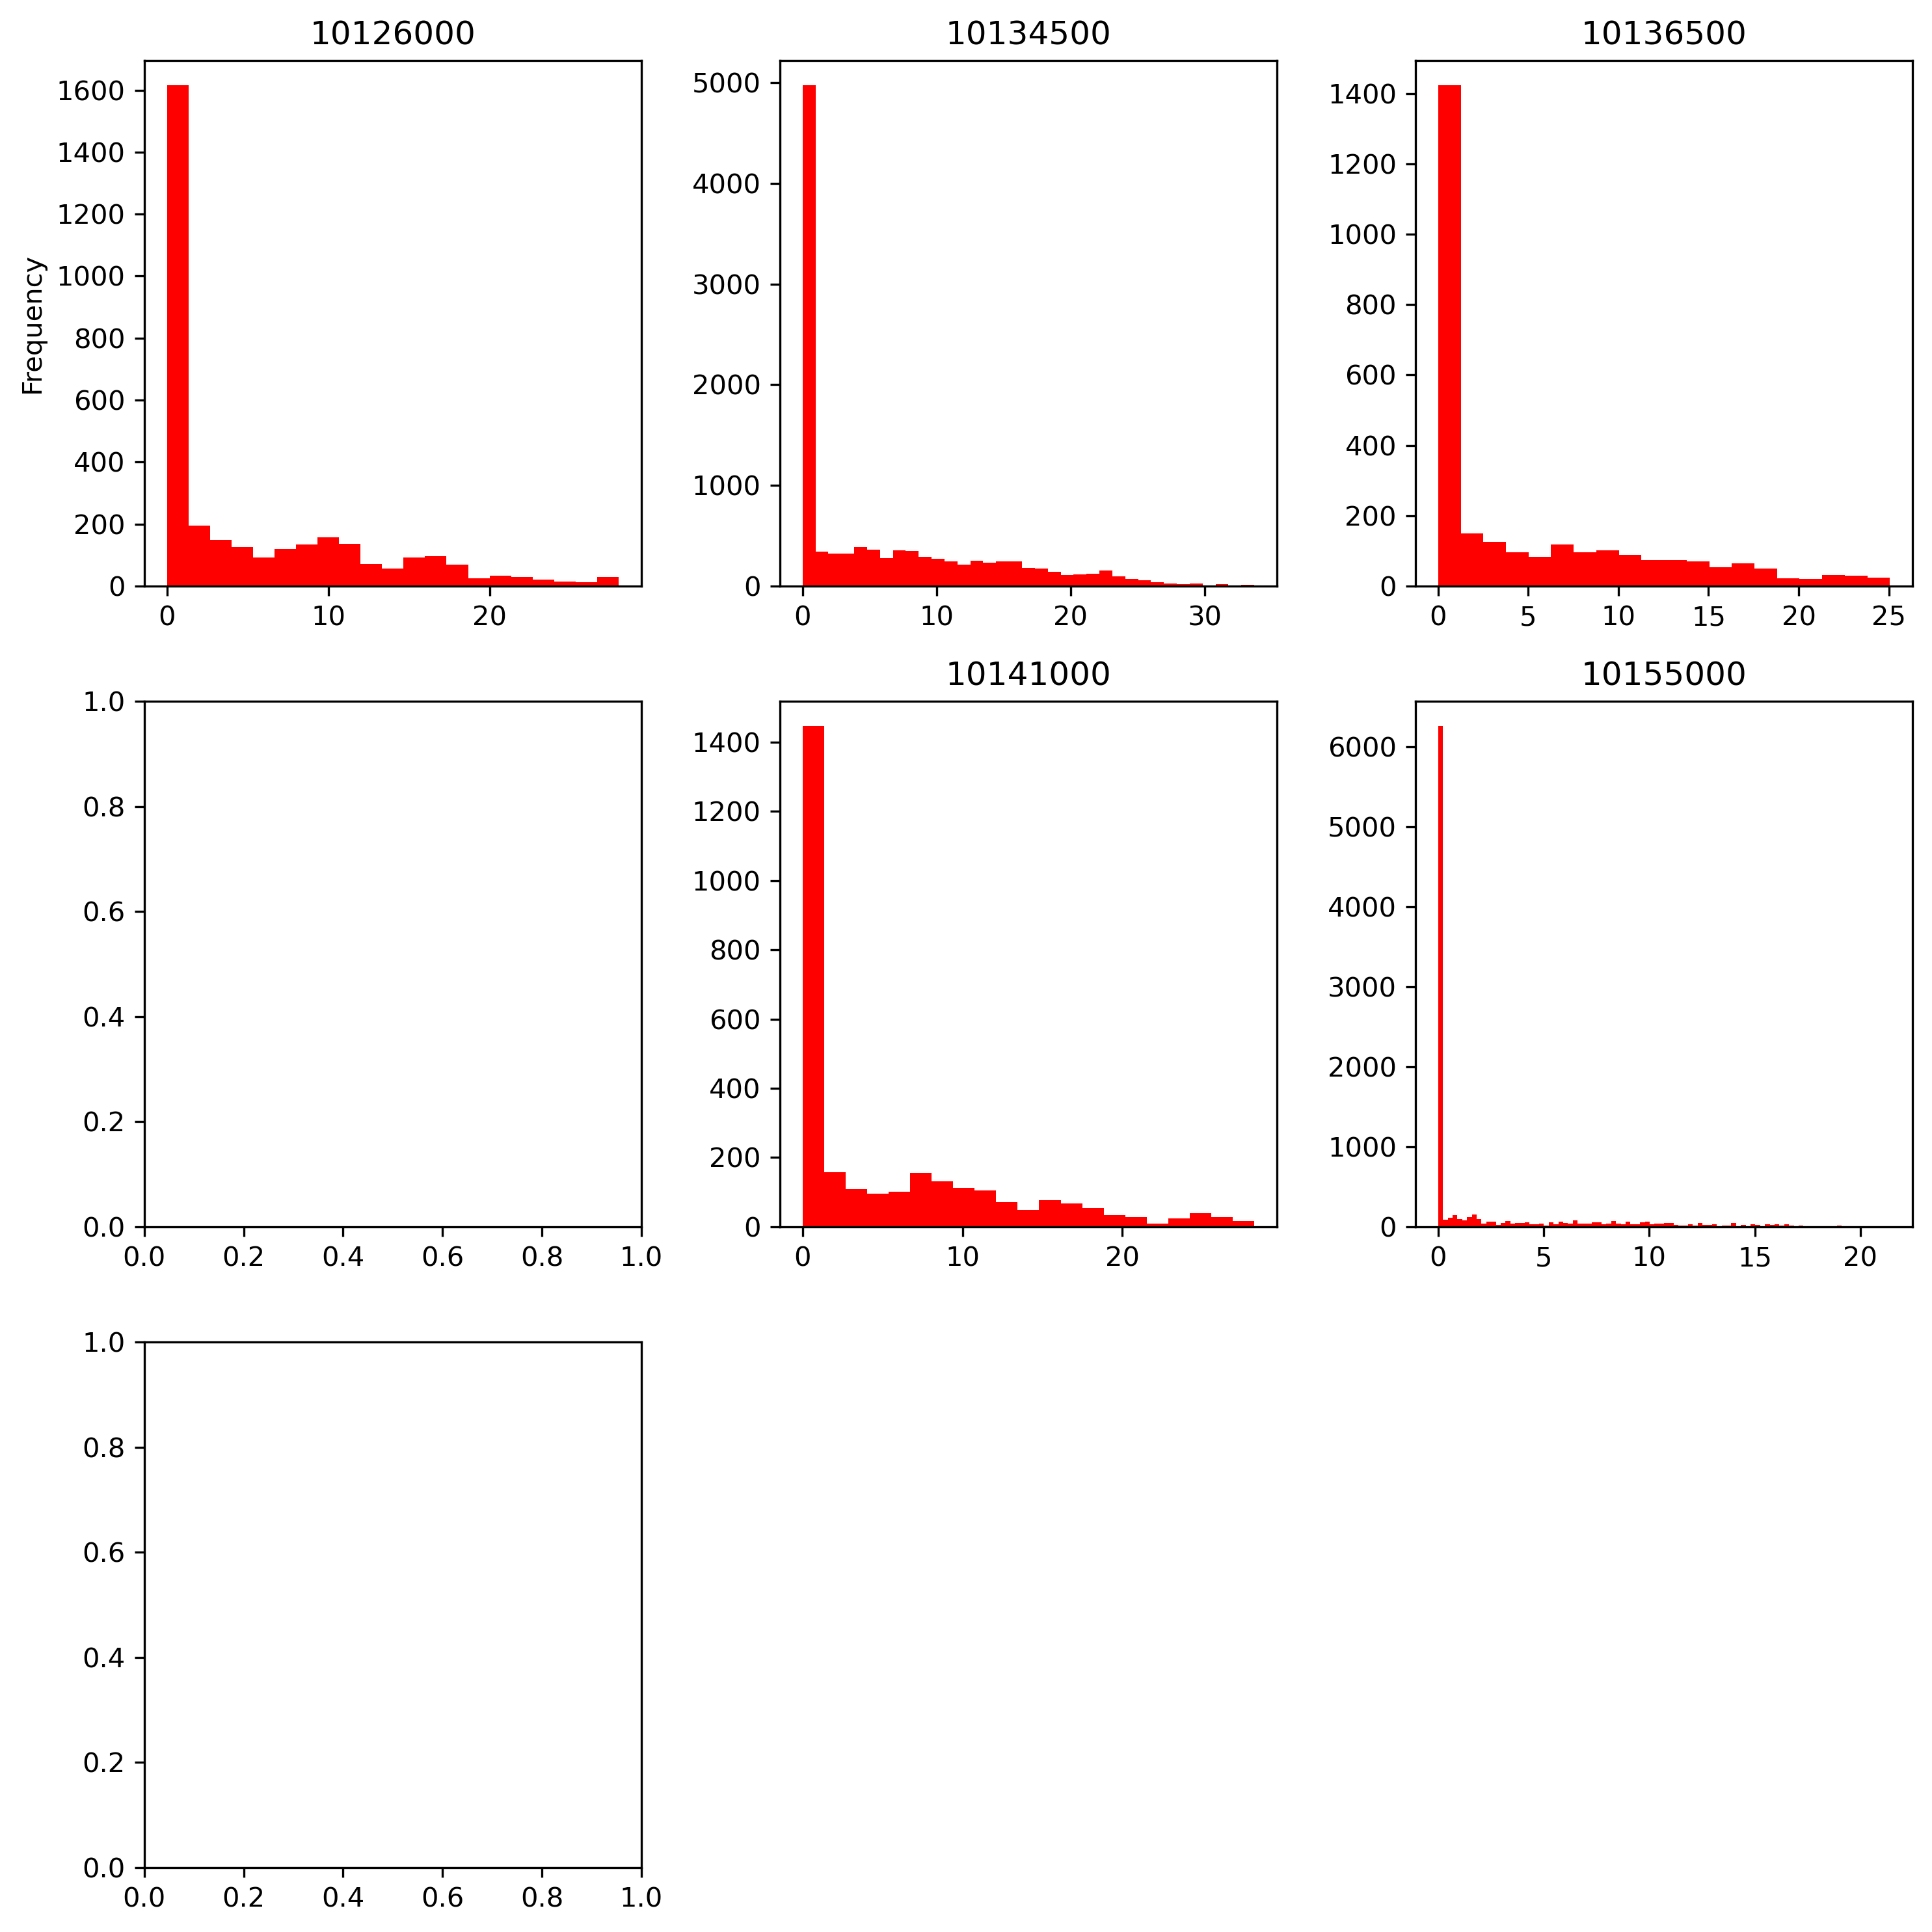

CPU times: user 1.37 s, sys: 64 ms, total: 1.44 s
Wall time: 1.43 s


In [7]:
%%time
# Determine the number of subplots based on the number of unique stations.
n_subplots = len(station_list)
# Calculate the number of columns for subplots based on the square root of the number of subplots.
n_cols = int(math.ceil(math.sqrt(n_subplots)))
# Calculate the number of rows for subplots based on the total subplots and columns.
n_rows = int(math.ceil(n_subplots / n_cols))
# Set the size of the figure for subplots.
figsize = (10, 10)
# Create a figure and a grid of subplots with the specified rows and columns, and figure size.
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, dpi=300)
axes = axes.flatten()  # Flatten the axes array for easier access in looping.

# Loop through each axis to plot histogram for each station.
for i, ax in enumerate(axes):
    if i < n_subplots:
        # Extract the data for the current station.
        temp_df_1 = dataset[dataset.station_id == station_list[i]]
        
        if temp_df_1['swe'].sum() != 0: # Checks if we have swe data for that station. 

            # Calculate the Interquartile Range (IQR) for the 'flow_cfs' data.
            IQR = np.percentile(temp_df_1['swe'], 75) - np.percentile(temp_df_1['swe'], 25)
            # Calculate the bin width using Freedman-Diaconis rule which is optimal for histogram.
            bin_width = 2 * IQR * (len(temp_df_1['swe']) ** (-1/3))
            # Calculate the number of bins for the histogram using the calculated bin width.
            bins_fd = int((max(temp_df_1['swe']) - min(temp_df_1['swe'])) / bin_width)
    
            # Plot a histogram of 'flow_cfs' for the station with calculated bins.
            ax.hist(temp_df_1['swe'], bins=bins_fd, color='red')
    
            # Set the title of the subplot to the station ID.
            ax.set_title(f'{station_list[i]}')
            # Set the x-axis label for subplots in the last row.
            if i // n_cols == n_rows - 1:
                ax.set_xlabel('Data Values')
    
            # Set the y-axis label for subplots in the first column.
            if i % n_cols == 0:
                ax.set_ylabel('Frequency')
    else:
        # Hide unused subplots.
        ax.axis('off')

# Adjust the layout to prevent overlapping elements.
plt.tight_layout()
# Uncomment the line below to save the figure to a file.
# plt.savefig(f'{save_path}scatter_annual_drought_number.png')
# Display the plot.
plt.show()


#### 4.4. Splitting the Data 
We split 80 percent of the data for training and the rest for testing the model.

In [6]:
# Create empty DataFrames for training and testing datasets.
data_train = pd.DataFrame()
data_test = pd.DataFrame()

# Loop through each station name in the list of station IDs.
for station_name in station_list:
    # Extract data for the current station and reset the index.
    temp_df_1 = dataset[dataset.station_id == station_name].reset_index(drop=True)
    
    # Determine the maximum and minimum years in the dataset for the current station.
    end_year = temp_df_1.datetime.dt.year.max()
    start_year = temp_df_1.datetime.dt.year.min()
    
    # Calculate the duration in years between the earliest and latest data points.
    duration = end_year - start_year
    
    # Calculate the division year to split training and testing data (80% for training).
    division_year = start_year + int(duration * 0.8)
    
    # Select data from the start year up to the division year for training, reset the index, and append to the training DataFrame.
    data_train = pd.concat((data_train.reset_index(drop=True), temp_df_1[temp_df_1.datetime < f'{division_year}-01-01'].reset_index(drop=True)), axis=0).reset_index(drop=True)
    
    # Select data from the division year onward for testing, reset the index, and append to the testing DataFrame.
    data_test = pd.concat((data_test.reset_index(drop=True), temp_df_1[temp_df_1.datetime >= f'{division_year}-01-01'].reset_index(drop=True)), axis=0).reset_index(drop=True)


## 5. Model Development 
#### 5.1. Defining the XGBoost Model 
As mentioned, we will use XGBoost in our tutorial, and we will use the  [dmlc XGBoost package](https://xgboost.readthedocs.io/en/stable/). Understanding and tuning the model parameters is critical in any ML model development since it will affect the final model performance. The XGBoost model has different parameters, and here, we will work on the three most important parameters of XGBoost:
  
* **`max_depth`** This parameter determines the maximum depth of each tree. This setting controls the complexity of the tree by restricting the number of levels or splits within it. Increasing the *max_depth* can help capture more complex patterns in the data, but it can also lead to overfitting, where the model becomes too specialized in the training data and performs poorly on new data. On the other hand, reducing the *max_depth* can help prevent overfitting, but it can also result in underfitting, where the model misses relevant patterns.

* **`n_estimators`** It determines the number of trees in the ensemble and controls how many boosting rounds the algorithm should perform. Boosting rounds add new trees that attempt to correct errors from previous rounds, leading to improved performance up to a point. However, too many trees can result in overfitting, where the model performs well on training data but poorly on unseen data. It also increases the running time of the model.

* **`eta`** It controls the step size used to update the weights of the trees during training and determines how much each new tree contributes to the overall model. A smaller *eta* value can make the model more robust to overfitting by slowing the learning process. However, more boosting rounds (n_estimators) may be required to achieve good performance. Conversely, a larger *eta* value allows the model to learn faster but increases the risk of overfitting.

We will call the *XGBRegressor()* model and specify its parameters.

**To make the process faster for this part we only use one station.**

Let's start investigating different parameters and find out the best possible values!!!!!!!!!!!!!!!!!

In [7]:
def evaluate_model(params, X_train, y_train):
    # Create an XGBoost regressor model with the provided parameters.
    model = xgb.XGBRegressor(**params)
    
    # Set up cross-validation configuration with 10 splits and 3 repeats, and a fixed random state for reproducibility.
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # Perform cross-validation to evaluate the model using the negative mean absolute error as the scoring method.
    # 'n_jobs=-1' enables using all CPU cores for parallel computation.
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    
    # Return the scores from the cross-validation.
    return scores


In [8]:
# Define the station ID to be used.
station_name = '10126000'
# Select and reset the index of feature columns from the training data where station ID matches.
x_train = data_train[data_train.station_id == station_name].iloc[:, 2:-1].reset_index(drop=True)
# Select and reset the index of the target column from the training data where station ID matches.
y_train = data_train[data_train.station_id == station_name].iloc[:, -1].reset_index(drop=True)

# Define the initial parameters for the XGBoost model.
params = {
    'n_estimators': 200,
    'max_depth': 5,
    'eta': 0.1,
}

# Evaluate the model with initial parameters and calculate the mean of absolute scores.
current_score = abs(evaluate_model(params, x_train, y_train).mean())
print(f"Initial score (cfs): {current_score} with params: {params}")

# Initialize the interactive tuning loop.
continue_tuning = True
while continue_tuning:
    # Prompt the user if they want to continue tuning.
    print('=====================================================================================')
    change = input("Do you want to change any variable? (y/n): ")
    if change.lower() == 'y':
        # Ask which parameter to change.
        variable = input("Which variable number? (n_estimators(1)/max_depth(2)/eta(3)):")
        # Map user input to the corresponding parameter.
        if variable == '1':
            variable = 'n_estimators'
        elif variable == '2':
            variable = 'max_depth'
        elif variable == '3':
            variable = 'eta'
        else:
            print('Error: Wrong Number')
            break

        # Prompt for the new value and validate the type.
        value = input(f"Enter the new value for {variable} (previous value {params[variable]}): ")
        if variable == 'n_estimators' or variable == 'max_depth':
            value = int(value)
        else:
            value = float(value)

        # Update parameter and re-evaluate the model.
        old_param = params[variable]
        params[variable] = value
        new_score = evaluate_model(params, x_train, y_train)
        print('**********************************************')
        print('Previous Mean Score (cfs): %.3f (Previous Score SD: %.3f)' % (abs(current_score.mean()), current_score.std()))
        print('New Mean Score (cfs): %.3f (New Score SD: %.3f)' % (abs(new_score.mean()), new_score.std()))
        print('**********************************************')
        current_score = new_score

        # Prompt if the new parameter setting should be kept.
        keep_answer = input(f"Do you want to keep the new variable?(y/n): ")
        if keep_answer == 'n':
            params[variable] = old_param
    else:
        # Exit tuning loop.
        continue_tuning = False
        print(f"Finished tuning ====================> Final parameters: {params}.")


Initial score (cfs): 152.80558477080083 with params: {'n_estimators': 200, 'max_depth': 5, 'eta': 0.1}


Do you want to change any variable? (y/n):  n


Finished tuning ====================> Final parameters: {'n_estimators': 200, 'max_depth': 5, 'eta': 0.1}.


#### !!!! Don't forget to train and save your model after tuning the hyperparameters as a Pickle file.


In [9]:
# Instantiate an XGBoost regressor model with the specified parameters.
xgboost_model = xgb.XGBRegressor(**params)

# Fit the model using the training dataset.
xgboost_model.fit(x_train, y_train)

# Save the trained model to a file using the pickle library for later use.
# 'save_path' should be defined earlier in your script and point to a directory where you have write permissions.
pickle.dump(xgboost_model, open(f'{output_path}best_manuall_model.pkl', "wb"))


#### 5.2. Scaling the Data
Generally, scaling the inputs is not required in decision-tree ensemble models. However, some studies suggest scaling the inputs since XGBoost uses the Gradient Decent algorithm in its core optimization. So here we will try both 
scaled and unscaled inputs to see the difference.
We will scale the data by using the *MinMaxScaler()* function from the Scikit-Learn library. 

In [10]:
# Function for scaling the data. 
def input_scale(x_train, y_train):

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    x_train_scaled, y_train_scaled = \
    scaler_x.fit_transform(x_train), scaler_y.fit_transform(y_train.values.reshape(-1, 1)).reshape(-1)
    joblib.dump(scaler_x, f'{output_path}scaler_x.joblib')
    joblib.dump(scaler_y, f'{output_path}scaler_y.joblib')
    return x_train_scaled, y_train_scaled, scaler_x, scaler_y


Let's use the model we made using scaled and unscaled data as input to see the effect of data scaling. This will show the impact of data scaling on our model's performance!!!!!!!!!!!!

In [11]:
# Load the scales for x and y data. 
scaler_x= joblib.load(f'{output_path}scaler_x.joblib')
scaler_y= joblib.load(f'{output_path}scaler_y.joblib')

# Define the custom scoring function
def inverse_mae(y_true, y_pred):
    y_pred_inverted = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    # Inverse transform true values
    y_true_inverted = scaler_y.inverse_transform(y_true.reshape(-1, 1)).flatten()
    return mean_absolute_error(y_true_inverted, y_pred_inverted)



# Create a scorer from the custom scoring function
inverse_mae_scorer = make_scorer(inverse_mae, greater_is_better=False)

# Assigning features by selecting all but the last column from the data_train DataFrame and resetting the index.
x_train = data_train.iloc[:, 2:-1].reset_index(drop=True)
# Assigning the target by selecting the last column from the data_train DataFrame and resetting the index.
y_train = data_train.iloc[:, -1].reset_index(drop=True)

# Initializing the RepeatedKFold for cross-validation with 10 splits, 3 repeats, and a fixed random seed for reproducibility.
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluating the XGBoost model using the cross-validation scheme defined above and calculating the negative mean absolute error.
scores = cross_val_score(xgboost_model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# Scaling the training data using the input_scale function defined earlier.
x_train_scaled, y_train_scaled, scaler_x_temp, scaler_y_temp = input_scale(x_train, y_train)

# Performing cross-validation on the scaled training data using a simpler 3-fold cross-validation method and calculating the negative mean absolute error.
scores_scaled = cross_val_score(xgboost_model, x_train_scaled, y_train_scaled, scoring=inverse_mae_scorer, cv=cv, n_jobs=-1)

# Printing the mean and standard deviation of the cross-validation scores for unscaled data.
print('Mean Score without Scaling : %.3f (Score SD: %.3f))' % (abs(scores.mean()), scores.std()))
# Printing the mean and standard deviation of the cross-validation scores for scaled data.
print('Mean Score with Scaling: %.3f (Score SD: %.3f))' % (abs(scores_scaled.mean()), scores_scaled.std()))


Mean Score without Scaling : 55.793 (Score SD: 2.149))
Mean Score with Scaling: 55.788 (Score SD: 2.123))


#### 5.3. Automatic Hypermeter Tuning
We investigated different values for each parameter, trying to tune it manually, which shows how difficult and time-consuming this process is. So, the next step is to use a simple automatic tuning method, Grird Search, to find the optimal hyperparameter values. To do so, we will use the *GirdSearchCV()* function of the Scikit-Learn library. 
This method gets possible values for each parameter and then tests all possible combinations one by one. It finds the optimal value, but it is very slow. It also uses cross-validation to evaluate each combination. 

First, we divide and scale our whole dataset for the automatic tuning. 

In [12]:
# Initialize dictionaries for storing scaled test datasets.
x_test_scaled = {}
y_test_scaled = {}
x_test = {}  # Missing declaration in your provided code.
y_test = {}  # Missing declaration in your provided code.


# Assigning features by selecting all but the last column from the data_train DataFrame and resetting the index.
x_train = data_train.iloc[:, 2:-1].reset_index(drop=True)
# Assigning the target by selecting the last column from the data_train DataFrame and resetting the index.
y_train = data_train.iloc[:, -1].reset_index(drop=True)

# Scale the training data and retrieve the scalers for later use on the test data.
x_train_scaled, y_train_scaled, scaler_x, scaler_y = input_scale(x_train, y_train)

# Loop over each station name from the list of station IDs.
for station_name in station_list:
    # Extract and store the features for the test data for each station.
    x_test[station_name] = data_test[data_test.station_id == station_name].iloc[:, 2:-1]
    # Extract and store the target variable for the test data for each station.
    y_test[station_name] = data_test[data_test.station_id == station_name].iloc[:, -1]
    # Scale the extracted test features and targets using the previously fitted scalers.
    x_test_scaled[station_name] = scaler_x.transform(x_test[station_name])
    y_test_scaled[station_name] = scaler_y.transform(y_test[station_name].values.reshape(-1, 1)).reshape(-1)


Then, we select the possible values or range of values. 

In [13]:
# Define the range of hyperparameters for XGBoost tuning.
# Note that 'range(100, 300, 200)' implies a single value because the step size leads directly to the limit.
# If you intend multiple steps, adjust the range appropriately.
hyperparameters_xgboost = {
    'max_depth': range(2, 4),  # Generates [2, 3] because 'range' is exclusive of the stop value.
    'n_estimators': range(100, 301, 200),  # To include both 100 and 300 if that was your intent.
    'eta': [0.1]  # Learning rate is a fixed value in this setup.
}

# Paths for saving the tuned hyperparameters and the trained model.
path_model_save_hyperparameters = f"{output_path}best_model_hyperparameters_xgboost.pkl"
path_model_save_model = f"{output_path}best_model_xgboost.pkl"


Next, we create a new XGBoost model and the grid search function. Then, we will run the function and compare the results with those in the previous section. 

In [14]:
# Initialize an XGBoost regressor model.
xgboost_model_automatic = xgb.XGBRegressor()

# Setup GridSearchCV with the XGBoost model and hyperparameter grid.
grid_search_3 = GridSearchCV(estimator=xgboost_model_automatic,  # Corrected to use the initialized model
                             param_grid=hyperparameters_xgboost,  # Dictionary of parameters to try
                             scoring='neg_mean_absolute_error',   # Scoring method MAE, reported as negative for maximization
                             cv=3,                                # Number of cross-validation folds
                             n_jobs=-1,                           # Use all available CPU cores
                             verbose=3)                           # Show detailed progress (level 3)

# Fit the GridSearchCV to the scaled training data.
grid_search_3.fit(x_train_scaled, y_train_scaled)

# Retrieve the best estimator from the grid search.
optimized_xgboost_model = grid_search_3.best_estimator_

# Output the best parameters and the corresponding score for those parameters.
print(f"Best parameters found: {grid_search_3.best_params_}")
print(f"Best RMSE: {abs(grid_search_3.best_score_)}")  # Print the absolute value of the RMSE



Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found: {'eta': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best RMSE: 0.025254321105991753


**Remember to save the best parameters after finding them!!!!!!**

In [15]:
joblib.dump(grid_search_3, path_model_save_hyperparameters)

['/home/jovyan/mydrive/01.projects/01.ciroh_p8/devcon_xgboost/03.output/best_model_hyperparameters_xgboost.pkl']

<div style="display: flex; justify-content: center; align-items: center; margin: auto;">
    <div style="margin: 10px;">
        <img src="../04.pic/q2.png" alt="Image 1" width="300">
    </div>
    <div style="margin: 10px;">
        <img src="q1.png" alt="Image 2" width="300">
    </div>
    <div style="margin: 10px;">
        <img src="q3.jpg" alt="Image 3" width="300">
    </div>
</div>


<center>
<strong style="font-size: 24px;">What other methods can we use to tune the parameters????</strong>
</center>



If the training dataset is too big (which is the case in real-world examples), we only use a small part to tune the parameters. Then, we have to train the model on the full dataset and save the model using the code below:

In [16]:
# Fit the optimized XGBoost model to the scaled training data.
optimized_xgboost_model = optimized_xgboost_model.fit(x_train_scaled, y_train_scaled)

# Save the trained model to a file using pickle. This serialized file can be loaded later to make predictions.
pickle.dump(optimized_xgboost_model, open(path_model_save_model, "wb"))


#### 5.4. Feature Selection
Feature selection is an important part of preprocessing the data, which we skipped since we first had to learn the model structure. After training the model, decision-tree ensembles can show us the importance of each feature in the prediction process. Then, based on the importance, we can remove less important features to make the model more complex.

First we will try it for one station and the model that we trained with one station data. 

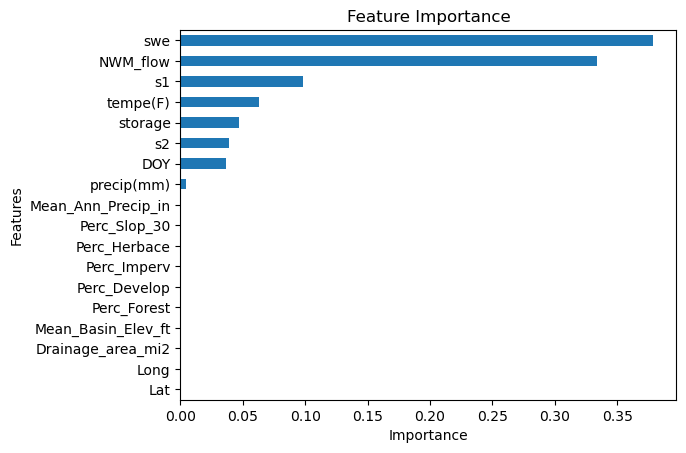

In [17]:
# Extract the feature names from the training dataset.
cols = x_train.columns

# Create a DataFrame containing the feature importances extracted from the optimized XGBoost model.
# Transpose the DataFrame for easier plotting (columns become rows and vice versa).
FI = pd.DataFrame(xgboost_model.feature_importances_, index=cols, columns=['Importance'])

# Plotting the feature importances as a horizontal bar chart.
ax = FI.sort_values('Importance', ascending=True).plot.barh()  # Sorting helps in better visualization.
ax.get_legend().remove()  # Remove the legend since it's typically not needed for a single-variable plot.
plt.title('Feature Importance')  # Setting the title of the plot.
plt.xlabel('Importance')  # Adding an x-label for clarity.
plt.ylabel('Features')  # Adding a y-label for clarity.
plt.show()  # Ensure the plot is displayed.


Now we will try it for all the stations.

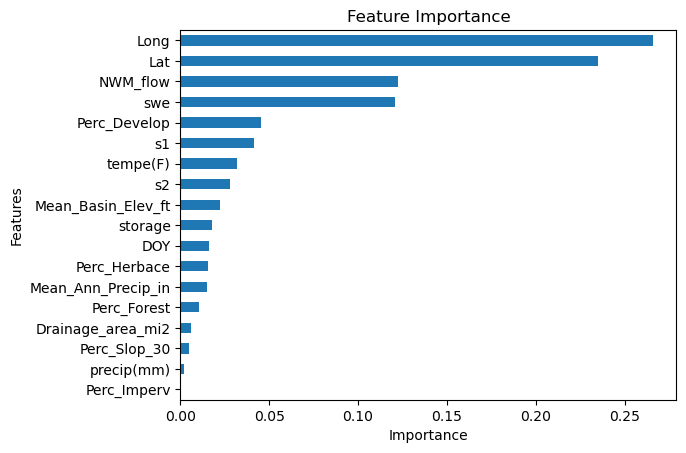

In [18]:
# Extract the feature names from the training dataset.
cols = x_train.columns

# Create a DataFrame containing the feature importances extracted from the optimized XGBoost model.
# Transpose the DataFrame for easier plotting (columns become rows and vice versa).
FI = pd.DataFrame(optimized_xgboost_model.feature_importances_, index=cols, columns=['Importance'])

# Plotting the feature importances as a horizontal bar chart.
ax = FI.sort_values('Importance', ascending=True).plot.barh()  # Sorting helps in better visualization.
ax.get_legend().remove()  # Remove the legend since it's typically not needed for a single-variable plot.
plt.title('Feature Importance')  # Setting the title of the plot.
plt.xlabel('Importance')  # Adding an x-label for clarity.
plt.ylabel('Features')  # Adding a y-label for clarity.
plt.show()  # Ensure the plot is displayed.


#### 5.5. Testing the Model
We will give the model the test set for each station and compare it with the observation to evaluate the model with a dataset it has not seen before. Before feeding the test data we load the model. 

In [31]:
# Initialize empty DataFrames to store evaluation results if not already defined.
EvalDF_all_rf = pd.DataFrame()
SupplyEvalDF_all_rf = pd.DataFrame()
df_eval_rf = pd.DataFrame()

# Iterate over each station name in the list of station IDs.
for station_name in station_list:
    # Retrieve scaled test features for the current station.
    x_test_scaled_temp = x_test_scaled[station_name]
    
    # Make predictions using the scaled test features.
    yhat_test_scaled = optimized_xgboost_model.predict(x_test_scaled_temp)
    
    # Inverse transform the scaled predictions to their original scale.
    yhat_test = scaler_y.inverse_transform(yhat_test_scaled.reshape(-1, 1))
    
    # Assuming EvalTable is a predefined function that compares predictions to actuals and returns evaluation DataFrames.
    EvalDF_all_rf_temp, SupplyEvalDF_all_rf_temp, df_eval_rf_temp = EvalTable(yhat_test.reshape(-1), data_test[data_test.station_id == station_name], 'xgboost')

    # Append the results from each station to the respective DataFrame.
    EvalDF_all_rf = pd.concat([EvalDF_all_rf, EvalDF_all_rf_temp], ignore_index=True)
    SupplyEvalDF_all_rf = pd.concat([SupplyEvalDF_all_rf, SupplyEvalDF_all_rf_temp], ignore_index=True)
    df_eval_rf = pd.concat([df_eval_rf, df_eval_rf_temp], ignore_index=True)

print("Model Performance for Daily cfs")
display(EvalDF_all_rf)   
print("Model Performance for Daily Accumulated Supply (Acre-Feet)")
display(SupplyEvalDF_all_rf)

Model Performance for Daily cfs


USGSid NHDPlusid NWM_RMSE xgboost_RMSE NWM_PBias xgboost_PBias NWM_KGE  \
0  10126000  10375648  1541.27        688.2    -37.02         22.44   -0.26   
1  10134500  10375648   129.04        44.56   -263.22         -7.62   -1.74   
2  10136500  10375648   566.59       224.12   -152.02          9.09   -0.57   
3  10137500  10375648   100.76        56.06     38.02         -1.59    0.44   
4  10141000  10375648  1034.88       320.45   -372.17         29.44   -2.77   
5  10155000  10375648   301.69       227.39     12.88          -2.6    0.52   
6  10164500  10375648   113.97        56.31   -114.21        -15.49   -1.02   

  xgboost__KGE NWM_MAPE xgboost_MAPE  
0         0.44   323.21        47.88  
1         0.56  1161.02       226.78  
2         0.56   349.99        75.46  
3         0.82     41.4        42.18  
4         0.38  1106.01        73.32  
5         0.87   128.95         62.2  
6         0.49    84.36         77.6

Model Performance for Daily Accumulated Supply (Acre-Feet)


USGSid NHDPlusid   NWM_RMSE xgboost_RMSE NWM_PBias xgboost_PBias NWM_KGE  \
0  10126000  10375648  185569.54    174398.16      -5.1          28.1    0.55   
1  10134500  10375648   49467.56      6190.96   -312.15        -14.69   -2.69   
2  10136500  10375648  188980.86      49983.7   -138.76          5.77   -0.64   
3  10137500  10375648   24233.65      9646.23     43.97          3.93     0.5   
4  10141000  10375648  362936.72     53036.57    -311.3          32.1   -2.63   
5  10155000  10375648   49943.01     35025.79     23.04          1.05    0.67   
6  10164500  10375648   23413.39      6981.85   -117.81         -19.1   -0.54   

  xgboost__KGE NWM_MAPE xgboost_MAPE    Obs_vol     NWM_vol xgboost_vol  \
0         0.59    29.46        25.86  655183.19  1149487.59    556441.2   
1         0.77   920.15       102.78   37262.28    96970.68    38109.91   
2         0.67   313.47        64.37  172949.05   490788.53   203257.86   
3         0.85    46.83        29.07   54744.01    39350.65    61924.12   
4         0.51   613.27        43.78  120033.77   685973.24     59113.1   
5          0.9    31.74        23.93   181010.8   126493.59    174259.3   
6         0.77   100.92        43.95   19609.37    59842.97    32844.64   

  NWM_vol_err xgboost_vol_err NWM_vol_Perc_diff xgboost_vol_Perc_diff  
0    494304.4        -98742.0             75.45                -15.07  
1    59708.41          847.63            160.24                  2.27  
2   317839.48        30308.81            183.78                 17.52  
3   -15393.36          7180.1            -28.12                 13.12  
4   565939.47       -60920.67            471.48                -50.75  
5   -54517.21         -6751.5            -30.12                 -3.73  
6    40233.61        13235.27            205.18                 67.49

In [47]:
EvalDF_all_rf.rename(columns={'USGSid': 'station_id'}, inplace=True)
df_modified = df_modified[['station_id', 'Lat', 'Long']]
df_modified = df_modified[['station_id', 'Lat', 'Long']].drop_duplicates().reset_index(drop=True)
EvalDF_all_rf_all = pd.merge(EvalDF_all_rf, df_modified[['station_id', 'Lat', 'Long']], on='station_id')

SupplyEvalDF_all_rf.rename(columns={'USGSid': 'station_id'}, inplace=True)
SupplyEvalDF_all_rf_all = pd.merge(SupplyEvalDF_all_rf, df_modified[['station_id', 'Lat', 'Long']], on='station_id')

In [13]:
# Load the scales for x and y data. 
scaler_x= joblib.load(f'{output_path}scaler_x.joblib')
scaler_y= joblib.load(f'{output_path}scaler_y.joblib')

# Define the custom scoring function
def inverse_mae(y_true, y_pred):
    y_pred_inverted = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    # Inverse transform true values
    y_true_inverted = scaler_y.inverse_transform(y_true.reshape(-1, 1)).flatten()
    return mean_absolute_error(y_true_inverted, y_pred_inverted)



# Create a scorer from the custom scoring function
inverse_mae_scorer = make_scorer(inverse_mae, greater_is_better=False)

# Assigning features by selecting all but the last column from the data_train DataFrame and resetting the index.
x_train = data_train.iloc[:, 2:-1].reset_index(drop=True)
# Assigning the target by selecting the last column from the data_train DataFrame and resetting the index.
y_train = data_train.iloc[:, -1].reset_index(drop=True)

# Initializing the RepeatedKFold for cross-validation with 10 splits, 3 repeats, and a fixed random seed for reproducibility.
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluating the XGBoost model using the cross-validation scheme defined above and calculating the negative mean absolute error.
scores = cross_val_score(xgboost_model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# Scaling the training data using the input_scale function defined earlier.
x_train_scaled, y_train_scaled, scaler_x_temp, scaler_y_temp = input_scale(x_train, y_train)

# Performing cross-validation on the scaled training data using a simpler 3-fold cross-validation method and calculating the negative mean absolute error.
scores_scaled = cross_val_score(xgboost_model, x_train_scaled, y_train_scaled, scoring=inverse_mae_scorer, cv=cv, n_jobs=-1)

# Printing the mean and standard deviation of the cross-validation scores for unscaled data.
print('Mean Score without Scaling : %.3f (Score SD: %.3f))' % (abs(scores.mean()), scores.std()))
# Printing the mean and standard deviation of the cross-validation scores for scaled data.
print('Mean Score with Scaling: %.3f (Score SD: %.3f))' % (abs(scores_scaled.mean()), scores_scaled.std()))


Mean Score without Scaling : 55.793 (Score SD: 2.149))
Mean Score with Scaling: 55.788 (Score SD: 2.123))


In [98]:
def categorize_kge(kge):
    if kge < 0:
        return 0
    elif 0 < kge <= 0.5:
        return 1
    elif 0.5 < kge <= 0.75:
        return 2
    elif 0.75 < kge :
        return 3

EvalDF_all_rf_all['NWM_KGE_cat'] = SupplyEvalDF_all_rf['NWM_KGE'].apply(categorize_kge)
EvalDF_all_rf_all['xgboost__KGE_cat'] = SupplyEvalDF_all_rf['xgboost__KGE'].apply(categorize_kge)

def categorize_pbias(pbias):
    if -15 < pbias < 0:
        return 0
    elif pbias < -15:
        return 1
    elif 0 < pbias < 15:
        return 2
    elif 15 < pbias :
        return 3    
EvalDF_all_rf_all['NWM_PBias_cat'] = SupplyEvalDF_all_rf['NWM_PBias'].apply(categorize_pbias)
EvalDF_all_rf_all['xgboost_PBias_cat'] = SupplyEvalDF_all_rf['xgboost_PBias'].apply(categorize_pbias)


In [21]:

shape_input = f'{input_path}shape/'

file_list = ['jordan', 'weber', 'bear']
# Load the shapefile

for file_name in file_list:
    gdf = gpd.read_file(f"{shape_input}{file_name}.shp")

    # Merge all polygons into one
    merged_polygon = gdf.unary_union

    # Create a new GeoDataFrame
    merged_gdf = gpd.GeoDataFrame(geometry=[merged_polygon], crs=gdf.crs)

    # Save the merged polygon to a new shapefile
    merged_gdf.to_file(f"{shape_input}{file_name}_merged.shp")

In [28]:
river_gdf_bear = gpd.read_file(f"{shape_input}river_bear.shp")

river_gdf_jordan_weber = gpd.read_file(f"{shape_input}river_jordan_weber.shp")

lake_gdf_jordan_weber = gpd.read_file(f"{shape_input}lake_jordan_weber.shp")

lake_gdf_bear = gpd.read_file(f"{shape_input}lake_bear.shp")

In [97]:
from matplotlib.patches import Patch

year = ['NWM KGE', 'XGBoost KGE', 'NWM PBias', 'XGBoost PBias']
name = 'Severity'
variable = ['NWM_KGE_cat', 'xgboost__KGE_cat', 'NWM_PBias_cat', 'xgboost_PBias_cat']


fig, axes = plt.subplots(2, 2, figsize=(10, 17), dpi=300, sharey=True, sharex=True)
axes = axes.flatten()

for ax_index, ax in enumerate(axes):
    colors = ['fuchsia', 'black', 'green']

    if ax_index < 2:
        df_points = EvalDF_all_rf_all[['Lat', 'Long', 'NWM_KGE_cat', 'xgboost__KGE_cat']]
    elif ax_index >= 2:
        df_points = EvalDF_all_rf_all[['Lat', 'Long', 'NWM_PBias_cat', 'xgboost_PBias_cat']]

    for file_name, color_name in zip(file_list, colors):
        if color_name == 'fuchsia':
            my_zorder = 5
        else:
            my_zorder = 1

        merged_gdf = gpd.read_file(f"{shape_input}{file_name}_merged.shp", zorder=my_zorder)

        merged_gdf.plot(ax=ax, alpha=0.9, facecolor='none', edgecolor=color_name, linewidth=1, label=file_name) 
    lats = df_points['Lat']  # Example latitudes
    lons = df_points['Long']   # Example longitudes
    values = df_points[f'{variable[ax_index]}']  # Values associated with each point

    # Create GeoDataFrame from coordinates
    points_data = gpd.GeoDataFrame({'Latitude': lats, 'Longitude': lons, 'Value': values},
                                geometry=[Point(xy) for xy in zip(lons, lats)],
                                crs="EPSG:4326")  # Define the coordinate reference system

    subset = river_gdf_bear[river_gdf_bear['StreamLeve'] == 4]
    subset.plot(ax=ax, color='darkblue', linewidth= 1.5, label=f'Stream Order', zorder=1)  # Multiply order by 2 for line width
    subset = river_gdf_bear[~(river_gdf_bear['StreamLeve'] == 4)]
    subset.plot(ax=ax, color='darkblue', linewidth= 0.5, label=f'Stream Order', zorder=1)  # Multiply order by 2 for line width


    subset = river_gdf_jordan_weber[(river_gdf_jordan_weber['StreamLeve'] == 4) & ((river_gdf_jordan_weber['StreamOrde'] == 5) | (river_gdf_jordan_weber['StreamOrde'] == 6))]
    subset.plot(ax=ax, color='darkblue', linewidth= 1.5, label=f'Stream Order', zorder=1)  # Multiply order by 2 for line width
    subset = river_gdf_jordan_weber[~((river_gdf_jordan_weber['StreamLeve'] == 4) & ((river_gdf_jordan_weber['StreamOrde'] == 5) | (river_gdf_jordan_weber['StreamOrde'] == 6)))]
    subset.plot(ax=ax, color='darkblue', linewidth= 0.5, label=f'Stream Order', zorder=1)  # Multiply order by 2 for line width

    # Define colors for each value
    # value_colors = {0: 'yellow', 1: 'orange', 2: 'red'}

    value_colors = {0: 'red', 1: 'orange', 2: 'lightgreen', 3: 'darkgreen'}


    # Plot the points GeoDataFrame with colors based on the 'Value'
    points_data.plot(ax=ax, marker='o', color=[value_colors[val] for val in points_data['Value']], markersize=50, label='Points', edgecolor='black', zorder=2)



    subset_lake_gdf_jordan_weber = lake_gdf_jordan_weber[(lake_gdf_jordan_weber['GNIS_Name'] != None) & (lake_gdf_jordan_weber['AreaSqKm'] >= 5) & ((lake_gdf_jordan_weber['FType'] == 390) | (lake_gdf_jordan_weber['FType'] == 436))]
    subset_lake_gdf_jordan_weber.plot(ax=ax, color='darkblue', linewidth= 0.5, label=f'Stream Order', zorder=1)  # Multiply order by 2 for line width



    subset_lake_gdf_bear = lake_gdf_bear[(lake_gdf_bear['GNIS_Name'] != None) & (lake_gdf_bear['AreaSqKm'] >= 5) & ((lake_gdf_bear['FType'] == 390) | (lake_gdf_bear['FType'] == 436))]
    subset_lake_gdf_bear.plot(ax=ax, color='darkblue', linewidth= 0.5, label=f'Stream Order', zorder=1)  # Multiply order by 2 for line width



    # colur_name = ['Low', 'Medium', 'High']
    if ax_index < 2:
        colur_name = ['< 0', '0 - 0.5', '0.5 - 0.75', '0.75 <']
    if ax_index >= 2:
        colur_name = ['< -15', '-15 - 0', '0 - 15', '15 <']

    # Create legend handles for sh
    # legend_handles = [Patch(facecolor='none', edgecolor=color, label=label) for color, label in zip(colors, file_list)]
    shapefile_handles = [Patch(facecolor='none', edgecolor=color, label=label) for color, label in zip(colors, file_list)]
    point_handles = [Patch(facecolor=color, edgecolor='none', label=f'{colur_name[val]}') for val, color in value_colors.items()]
    all_handles = shapefile_handles + point_handles
    # Add titles and labels if necessary
    ax.set_title(f'{year[ax_index]} ')
    if ax_index == 0 or ax_index == 2:
        ax.set_ylabel('Latitude')
    if ax_index >= 2:
        ax.set_xlabel('Longitude')

    # Show the plot
    ax.legend(handles=all_handles, loc='lower left')

plt.tight_layout()
# plt.savefig(f'{output_path_general}map_{name}_{year[0]}_{durtation_num}.png', bbox_inches='tight')
plt.show()